In [2]:
!pip install yfinance --quiet

In [3]:
!pip install -U vectorbt --quiet

- Let's test the moving average crossover strategy using Vectorbt as a backtest tool.

- Moving averages are defined by the number of periods included in the calculation. Normally, a smaller number of periods is used in conjunction with another with a greater number of periods.

- When the short average goes above the long average it can mean an uptrend and downtrend when the opposite occurs.

- Moving averages have been used by statistics for years to smooth values ​​in time series, filtering out noise caused by short-term fluctuations and highlighting long-term trends or cycles.

In [4]:
import pandas as pd
import yfinance as yf
import vectorbt as vbt

In [5]:
# History of the Nifty Index
data = vbt.YFData.download('^NSEI').get()

In [6]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+00:00,4518.450195,4549.049805,4482.850098,4494.649902,0,0,0
2007-09-18 00:00:00+00:00,4494.100098,4551.799805,4481.549805,4546.200195,0,0,0
2007-09-19 00:00:00+00:00,4550.250000,4739.000000,4550.250000,4732.350098,0,0,0
2007-09-20 00:00:00+00:00,4734.850098,4760.850098,4721.149902,4747.549805,0,0,0
2007-09-21 00:00:00+00:00,4752.950195,4855.700195,4733.700195,4837.549805,0,0,0


In [7]:
data.shape

(3637, 7)

In [8]:
closing = data['2012':]['Close'].copy()

###Calculating moving averages

In [9]:
medium_short = vbt.MA.run(closing, 10) #fast average
medium_long = vbt.MA.run(closing, 60) #slow average

##**Strategy**

- **BUY** (= +1) : short average rises above the long average.
- **SELL** (= -1) : the short average goes back below the long average.

In [10]:
buy = medium_short.ma_crossed_above(medium_long)
sell = medium_short.ma_crossed_below(medium_long)

###Execution of the backtest considering the buy and sell signals calculated previously

In [11]:
pf = vbt.Portfolio.from_signals(closing, buy, sell, freq='d', init_cash=10000)

In [12]:
pf.total_return()

1.5423583812600732

###Order chart: buy and sell

In [13]:
!pip install -U kaleido --quiet

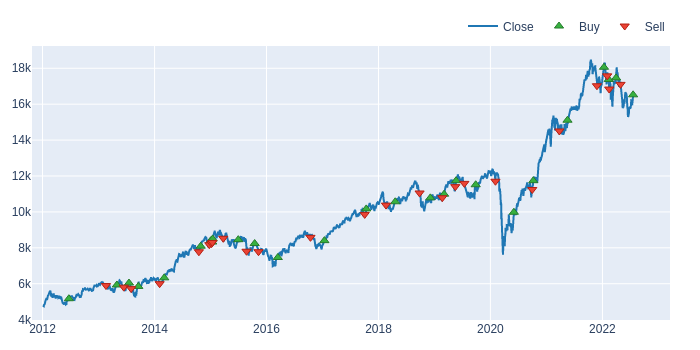

In [14]:
pf.plot_orders().show_png()

##Comparing the strategy with the Long Only option

In [15]:
retrun_long_only = closing.pct_change() 

In [16]:
strategies = pd.concat([pf.returns(), retrun_long_only], axis=1)
strategies.columns = ['Crossing MM', 'Long Only']

In [17]:
strategies.tail()

,Crossing MM,Long Only
Date,,
2022-07-15 00:00:00+00:00,0.000000,0.006936
2022-07-18 00:00:00+00:00,0.000000,0.014287
2022-07-19 00:00:00+00:00,0.000000,0.003812
2022-07-20 00:00:00+00:00,0.000000,0.011034
2022-07-21 00:00:00+00:00,0.005109,0.005109


In [19]:
#getting the accumulated return
returns = (strategies + 1).cumprod()-1

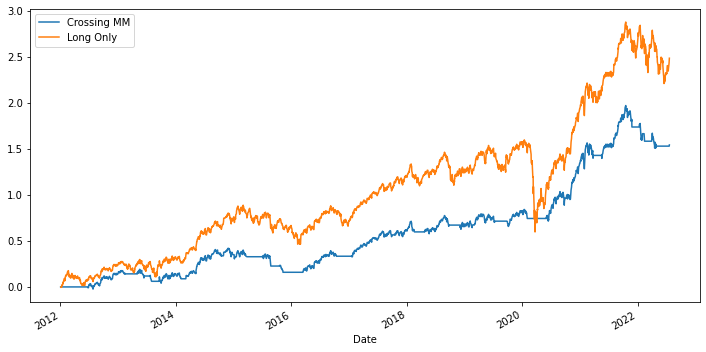

In [20]:
returns.plot(figsize=(12,6));

In [21]:
# Final return of each strategy
returns.tail(1)

,Crossing MM,Long Only
Date,,
2022-07-21 00:00:00+00:00,1.542358,2.484618


##What are the signs of the last 5 days?

In [22]:
signs = pd.concat([buy, sell], axis=1)
signs.columns = ['Buy', 'Sell']

In [23]:
signs.tail(5)

,Buy,Sell
Date,,
2022-07-15 00:00:00+00:00,False,False
2022-07-18 00:00:00+00:00,False,False
2022-07-19 00:00:00+00:00,False,False
2022-07-20 00:00:00+00:00,True,False
2022-07-21 00:00:00+00:00,False,False
